# YouTube Trending Videos Statistical Analysis

## INTRODUCTION

#### to be edited</b>
<b>https://www.kaggle.com/rsrishav/youtube-trending-video-dataset

In [1]:
# Importing libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp

%matplotlib inline

In [2]:
'''
Later on we can also remove the ones we wouldn't use
'''
# Importing dataset
data_gb = pd.read_csv("../data/GB_youtube_trending_data.csv",sep=",")  #uk  
data_fr = pd.read_csv("../data/FR_youtube_trending_data.csv",sep=",")  #france
data_us = pd.read_csv("../data/US_youtube_trending_data.csv",sep=",")  #usa 
data_ru = pd.read_csv("../data/RU_youtube_trending_data.csv",sep=",")  #russia
data_de = pd.read_csv("../data/DE_youtube_trending_data.csv",sep=",")  #germany 
data_ca = pd.read_csv("../data/CA_youtube_trending_data.csv",sep=",")  #canada   
data_kr = pd.read_csv("../data/KR_youtube_trending_data.csv",sep=",")  #southkorea   
data_jp = pd.read_csv("../data/JP_youtube_trending_data.csv",sep=",")  #japan
data_br = pd.read_csv("../data/BR_youtube_trending_data.csv",sep=",")  #brazil
data_mx = pd.read_csv("../data/MX_youtube_trending_data.csv",sep=",")  #mexico

In [3]:
'''
This can stay for now to easily see what are our properties in the dataset. We can delete it once
we are familiar with the dataset
'''
brief_list_col = []
brief_list = []

for i in range(0,len(data_gb.columns)):
    brief_list_col.append(data_gb.columns[i])
    brief_list.append(data_gb[data_gb.columns[i]][0])

brief_df = pd.DataFrame(brief_list_col,columns=["Property"])
brief_df.insert(1,"Output",brief_list,True)
brief_df

,Property,Output
0,video_id,J78aPJ3VyNs
1,title,I left youtube for a month and THIS is what ha...
2,publishedAt,2020-08-11T16:34:06Z
3,channelId,UCYzPXprvl5Y-Sf0g4vX-m6g
4,channelTitle,jacksepticeye
5,categoryId,24
6,trending_date,2020-08-12T00:00:00Z
7,tags,jacksepticeye|funny|funny meme|memes|jacksepti...
8,view_count,2038853
9,likes,353790


                                       **INDIVIDUAL PARTS**

### Data Cleaning & Wrangling

In [4]:
'''
Adding json files
'''
gb_json = pd.read_json('../data/GB_category_id.json')
fr_json = pd.read_json('../data/FR_category_id.json')
us_json = pd.read_json('../data/US_category_id.json')
ru_json = pd.read_json('../data/RU_category_id.json')
de_json = pd.read_json('../data/DE_category_id.json')
ca_json = pd.read_json('../data/CA_category_id.json')
kr_json = pd.read_json('../data/KR_category_id.json')
jp_json = pd.read_json('../data/JP_category_id.json')
br_json = pd.read_json('../data/BR_category_id.json')
mx_json = pd.read_json('../data/MX_category_id.json')

In [5]:
'''
Defining function to flat json files to get rid of dictionary format for every country
'''

col_list = ["items","items_snippet"]

def flat_func(df,column):
    for column in col_list:
        flatten = pd.DataFrame(dict(df[column])).transpose()
        columns = [str(i) for i in flatten.columns]
        flatten.columns = [column + "_" + str(colname) for colname in columns]
        df = pd.concat([df,flatten],axis=1)
        df = df.drop(column,axis=1)
    return df

In [6]:
'''
Applying function
Creating flat databases
'''

gb_flat = flat_func(gb_json,col_list)[["items_id","items_snippet_title"]]
fr_flat = flat_func(fr_json,col_list)[["items_id","items_snippet_title"]]
us_flat = flat_func(us_json,col_list)[["items_id","items_snippet_title"]]
ru_flat = flat_func(ru_json,col_list)[["items_id","items_snippet_title"]]
de_flat = flat_func(de_json,col_list)[["items_id","items_snippet_title"]]
ca_flat = flat_func(ca_json,col_list)[["items_id","items_snippet_title"]]
kr_flat = flat_func(kr_json,col_list)[["items_id","items_snippet_title"]]
jp_flat = flat_func(jp_json,col_list)[["items_id","items_snippet_title"]]
br_flat = flat_func(br_json,col_list)[["items_id","items_snippet_title"]]
mx_flat = flat_func(mx_json,col_list)[["items_id","items_snippet_title"]]

In [7]:
'''
Dropping categoryId 29 for each country
'''

data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

def category_remover(country):
    drop_idx = country[country["categoryId"]==29].index
    return drop_idx

data_gb = data_gb.drop(category_remover(data_gb))
data_fr = data_fr.drop(category_remover(data_fr))
data_us = data_us.drop(category_remover(data_us))
data_ru = data_ru.drop(category_remover(data_ru))
data_de = data_de.drop(category_remover(data_de))
data_ca = data_ca.drop(category_remover(data_ca))
data_kr = data_kr.drop(category_remover(data_kr))
data_jp = data_jp.drop(category_remover(data_jp))
data_br = data_br.drop(category_remover(data_br))
data_mx = data_mx.drop(category_remover(data_mx))

In [8]:
'''
Creating function to add trend name next to categoryId for every country
'''
def trend_adder(country_df,country_flat):
    trend = []
    for trend_id in country_df["categoryId"]:
        for i in range(0,len(country_flat)):
            if trend_id == int(country_flat["items_id"][i]):
                trend.append(country_flat["items_snippet_title"][i])

    country_df.insert(6,"trend",trend)     

In [9]:
'''
Applying Function
Adding trend column next to categoryId for every country
'''
trend_order_data_country = [data_gb,data_fr,data_us,data_ru,data_de,
                            data_ca,data_kr,data_jp,data_br,data_mx]

trend_order_data_flat = [gb_flat,fr_flat,us_flat,ru_flat,de_flat,
                         ca_flat,kr_flat,jp_flat,br_flat,mx_flat]

for i in range(0,len(trend_order_data_country)):
    trend_adder(trend_order_data_country[i],trend_order_data_flat[i])

In [10]:
'''
Scrapping the most updated row for each link.

Not the best way but kinda stuck while trying to retrieve local variables from function so this will
give us what we want for now..
'''
def get_recent_idx(country):
    latest_idx = []
    for link in np.array(country["video_id"].unique()):
        latest_row = country[(country["video_id"] ==
                                      link)][["view_count"]].nlargest(1,"view_count").index[0]
    
        latest_idx.append(latest_row)
    return country[country.index.isin(latest_idx)]
   
data_gb_unique = get_recent_idx(data_gb)
data_fr_unique = get_recent_idx(data_fr)
data_us_unique = get_recent_idx(data_us)
data_ru_unique = get_recent_idx(data_ru)
data_de_unique = get_recent_idx(data_de)
data_ca_unique = get_recent_idx(data_ca)
data_kr_unique = get_recent_idx(data_kr)
data_jp_unique = get_recent_idx(data_jp)
data_br_unique = get_recent_idx(data_br)
data_mx_unique = get_recent_idx(data_mx)

### Data Analysis

In [11]:
'''
No null values.
'''
data_gb_unique.isnull().sum()

video_id              0
title                 0
publishedAt           0
channelId             0
channelTitle          0
categoryId            0
trend                 0
trending_date         0
tags                  0
view_count            0
likes                 0
dislikes              0
comment_count         0
thumbnail_link        0
comments_disabled     0
ratings_disabled      0
description          23
dtype: int64

In [12]:
'''
For quick look. Will be deleted.
'''

data_gb_numerical = data_gb_unique[["view_count","likes","dislikes","comment_count"]]
data_gb_unique_pivot_table = pd.pivot_table(data_gb_unique,values=(["view_count","likes",
                                                                    "dislikes","comment_count"])
                                            ,aggfunc="sum",index="trend")
data_gb_unique_pivot_table

,comment_count,dislikes,likes,view_count
trend,,,,
Autos & Vehicles,260805,44400,3191581,55917651
Comedy,1057001,206928,17952077,206142921
Education,401346,61893,4853841,74887276
Entertainment,5474915,1384350,68352753,1091820159
Film & Animation,560603,155201,7017811,143054112
Gaming,2190586,731890,24188088,509275146
Howto & Style,479648,209799,6753120,114483319
Music,24306545,4679051,162292594,2336477998
News & Politics,485364,169690,1088567,79180012


In [13]:
'''
Checking correlations between numerical columns.
'''
data_gb_numerical.corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.932037,0.846647,0.777414
likes,0.932037,1.000000,0.792857,0.788863
dislikes,0.846647,0.792857,1.000000,0.735443
comment_count,0.777414,0.788863,0.735443,1.000000


### Data Visualization

In [14]:
# Setting plot parameters

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (14,7)

Text(0.5, 1.0, 'Correlation Heatmap of UK')

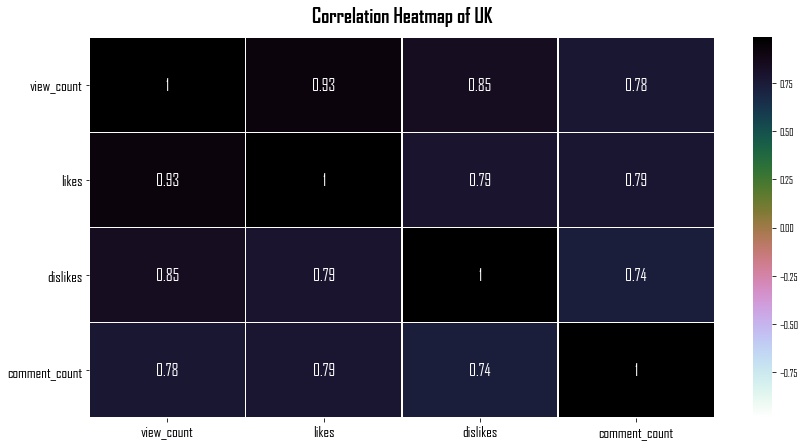

In [15]:
'''
As we have seen before, view_count,likes,dislikes and comment_counts are highly correlated between
each other.

Yet, even though most of them tend to be a strong correlation, the weakest amongst them belong to
correlation between view_count vs. comment_count. I believe this is because for people 
liking/disliking the video is much easier & faster rather than spending few minutes to comment.
'''

# Checking correlation with heatmap

sns.heatmap(data_gb_numerical.corr(),annot=True,annot_kws={"size": 16},
            vmin=-0.99,vmax=0.99,cbar=True,linewidth=0.5, cmap="cubehelix_r")
plt.xticks(size=15)
plt.yticks(rotation=0,size=15)
plt.title("Correlation Heatmap of UK",size=20,fontweight="bold",pad=15)

In [16]:
'''
Creating pivot table function for each country for plotting

will be used shortly
'''
data_unique_countries = [data_gb_unique,data_fr_unique,data_us_unique,data_ru_unique,
                         data_de_unique,data_ca_unique,data_kr_unique,data_jp_unique
                         ,data_br_unique,data_mx_unique]


def categorized_pivot_table(df):
    
    categorized_pivot_table = pd.pivot_table(df,values=(
        "view_count","likes","dislikes","comment_count",),index="trend")
    return categorized_pivot_table

In [17]:
'''
Later on we can also remove the ones we wouldn't use
'''
# Importing dataset
data_gb = pd.read_csv("../data/GB_youtube_trending_data.csv",sep=",")  #uk  
data_fr = pd.read_csv("../data/FR_youtube_trending_data.csv",sep=",")  #france
data_us = pd.read_csv("../data/US_youtube_trending_data.csv",sep=",")  #usa 
data_ru = pd.read_csv("../data/RU_youtube_trending_data.csv",sep=",")  #russia
data_de = pd.read_csv("../data/DE_youtube_trending_data.csv",sep=",")  #germany 
data_ca = pd.read_csv("../data/CA_youtube_trending_data.csv",sep=",")  #canada   
data_kr = pd.read_csv("../data/KR_youtube_trending_data.csv",sep=",")  #southkorea   
data_jp = pd.read_csv("../data/JP_youtube_trending_data.csv",sep=",")  #japan
data_br = pd.read_csv("../data/BR_youtube_trending_data.csv",sep=",")  #brazil
data_mx = pd.read_csv("../data/MX_youtube_trending_data.csv",sep=",")  #mexico

In [18]:
'''
Creating a function to draw subtplots for each country
'''

plot_columns = ["view_count","likes","dislikes","comment_count"]
plot_colors = ["lightblue","green","red","darkorange"]
plot_titles = ["View counts per Trend","Likes per Trend",
               "Dislikes per Trend","Comment counts per Trend"]
plot_titles_countries = ["UK","France","USA","Russia","Germany","Canada",
                         "SouthKorea","Japan","Brazil","Mexico"]



def plot_drawer(df_pivot,plot_cols,plot_titles):
    plt.rc('font', weight='bold')
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
    plt.rcParams["figure.figsize"] = (14,40)
    
    fig1, ax = plt.subplots(4,1)
    

    for subplot_index in range(0,4):
        
        df_pivot[[plot_columns[subplot_index]]].sort_values(
        by=plot_columns[subplot_index],ascending=False).plot.barh(
        ax=ax[subplot_index],stacked=True,edgecolor="k",lw=1,color=plot_colors[subplot_index])
        
        
        ax[subplot_index].set_title(plot_titles[subplot_index],size=28,
                                    fontweight="bold",pad=10,color="k")
    
    
        legend_fix = mpatches.Patch(color=plot_colors[subplot_index], 
                                      label=plot_columns[subplot_index])
        ax[subplot_index].legend(handles=[legend_fix],edgecolor="k",prop={"size":22})
        
        ax[subplot_index].grid(True,color="k",ls=":")
        
    
        #only for this one
        ax[0].get_xaxis().get_major_formatter().set_scientific(False)

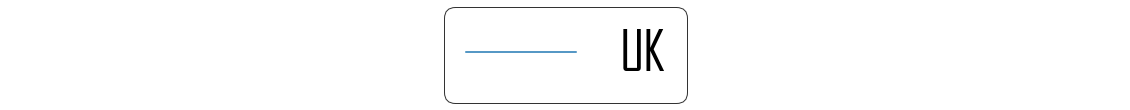

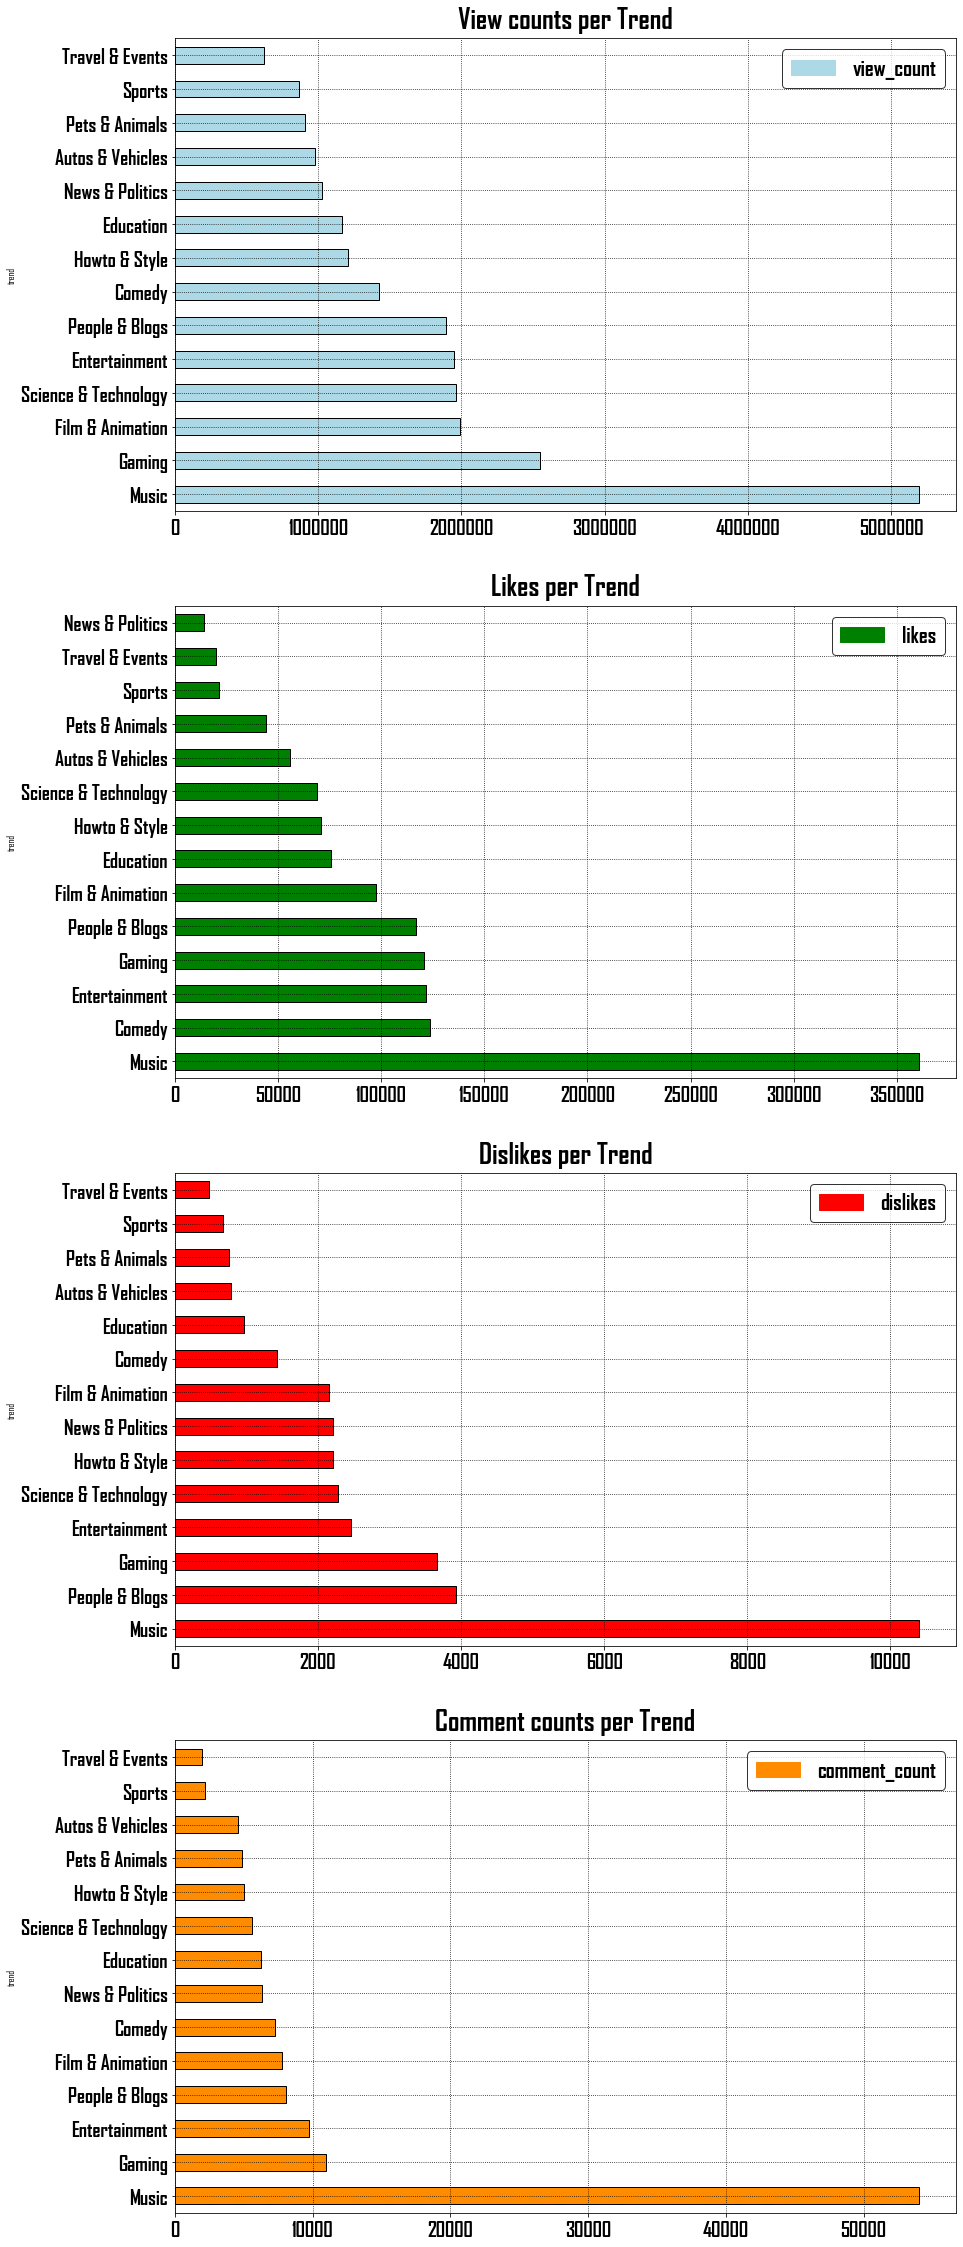

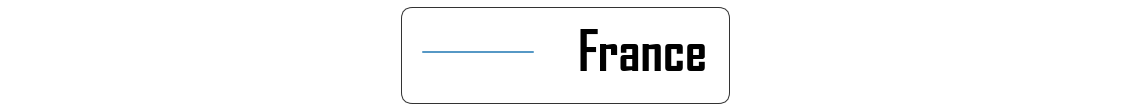

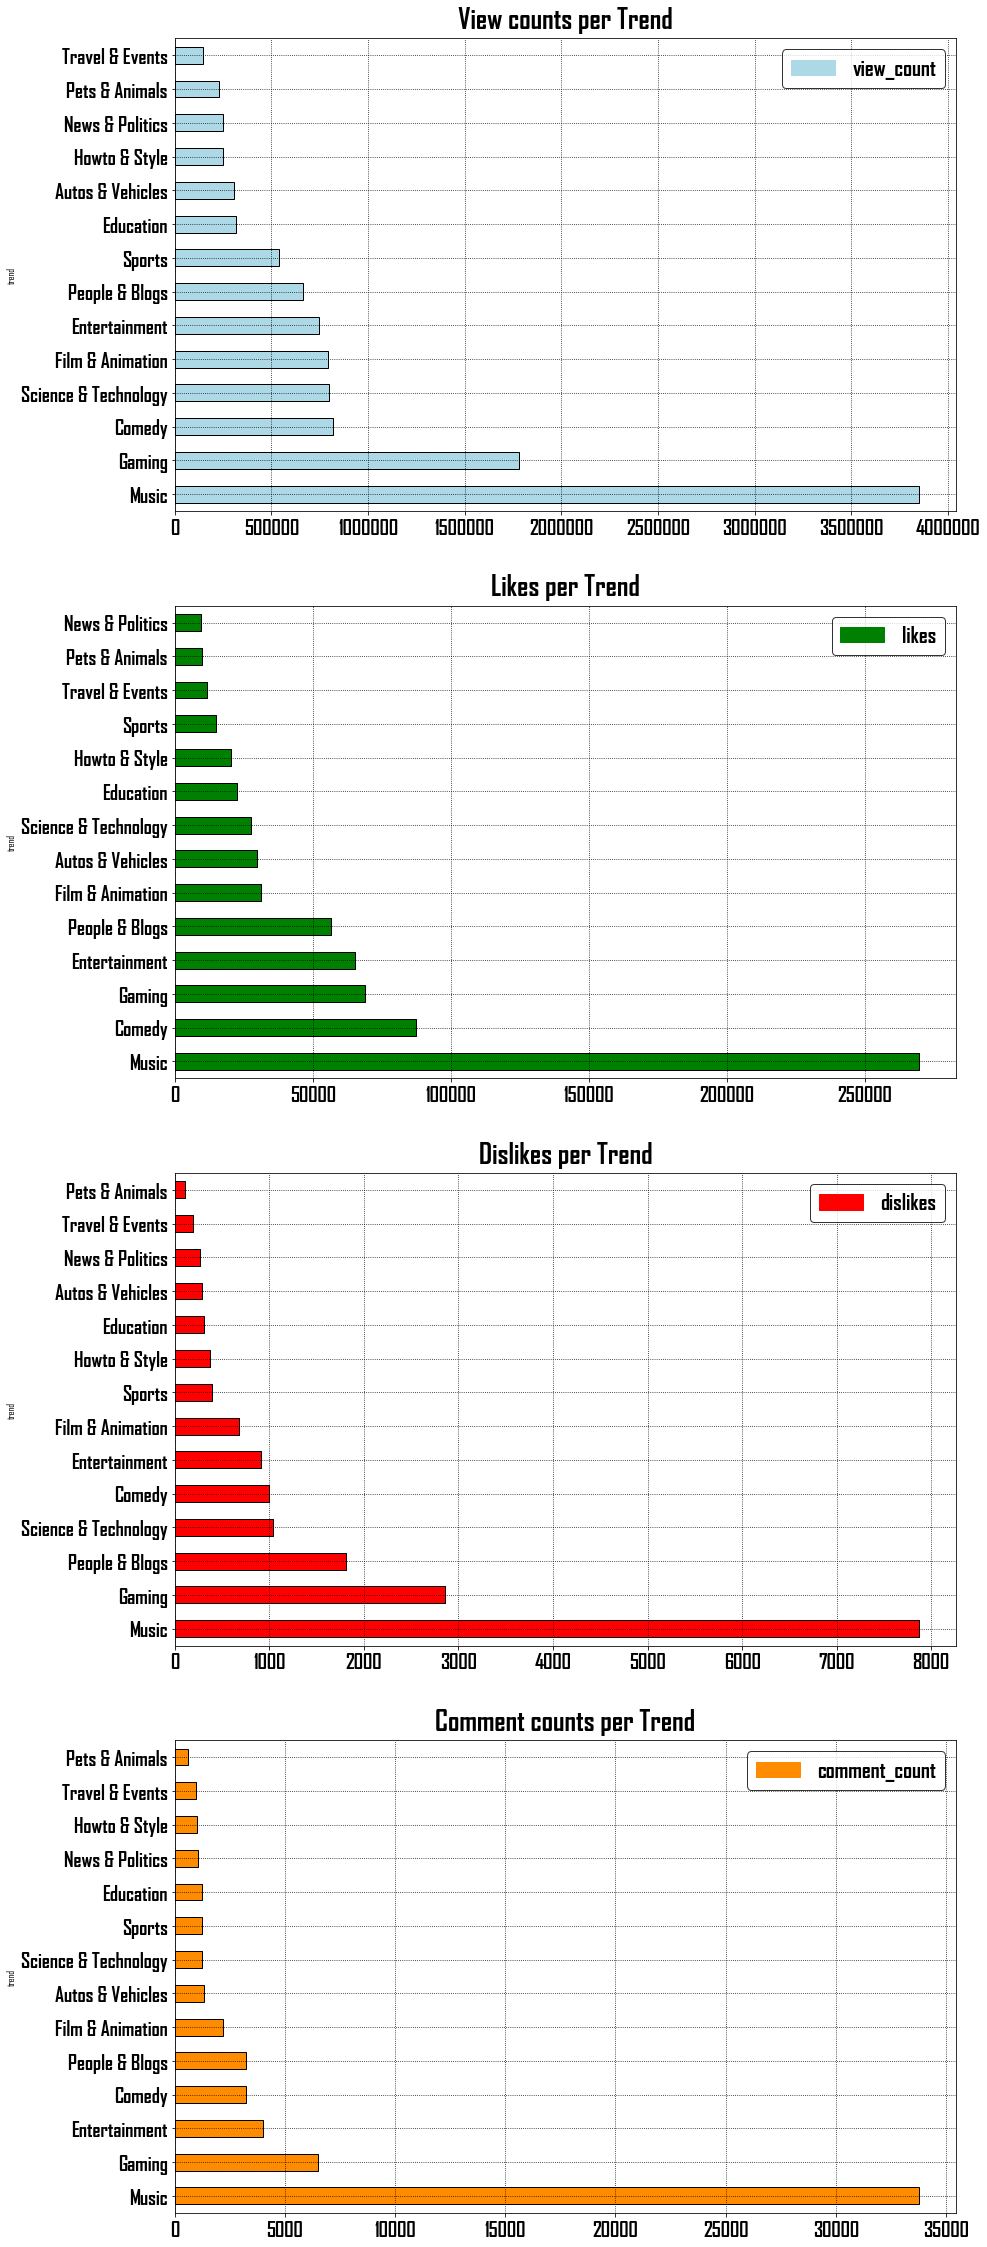

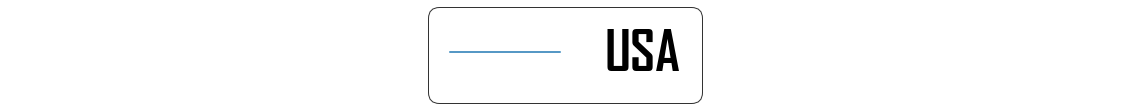

In [ ]:
'''
Applying plot function & pivot_table function to all databases;
'''
plot_titles_countries = {1:"UK",2:"France",3:"USA",4:"Russia",5:"Germany",6:"Canada",
                         7:"SouthKorea",8:"Japan",9:"Brazil",10:"Mexico"}


# Creating fake plot for title
fig2, ax = plt.subplots(1,1,figsize=(20,1))
ax.plot([1,1],[1,1],label="UK")
ax.legend(loc="center",edgecolor="k",prop={"size":55})
plt.axis('off')


c = 1
for unique_country in data_unique_countries:
    plot_drawer(categorized_pivot_table(unique_country),plot_colors,plot_titles)
    
    # Creating fake plots as title
    if c < 10:
        fig2, ax = plt.subplots(1,1,figsize=(20,1))
        ax.plot([1,1],[1,1],label=plot_titles_countries[c+1])
        ax.legend(loc="center",edgecolor="k",prop={"size":55})
        plt.axis('off')
        c += 1

### TEST

'''
Finding discrepancy between csv & json files. Those categoryId's has to be dropped since they are not
existing in JSON files.

Only category ID 29 is missing in 7 countries out of 10.

Trend name of ID 29 is: Nonprofits & Activism

So I have dropped categoryId:29 for all countries.
'''

data_gb = pd.read_csv("../data/GB_youtube_trending_data.csv",sep=",")  #uk  
data_fr = pd.read_csv("../data/FR_youtube_trending_data.csv",sep=",")  #france
data_us = pd.read_csv("../data/US_youtube_trending_data.csv",sep=",")  #usa 
data_ru = pd.read_csv("../data/RU_youtube_trending_data.csv",sep=",")  #russia
data_de = pd.read_csv("../data/DE_youtube_trending_data.csv",sep=",")  #germany 
data_ca = pd.read_csv("../data/CA_youtube_trending_data.csv",sep=",")  #canada   
data_kr = pd.read_csv("../data/KR_youtube_trending_data.csv",sep=",")  #southkorea   
data_jp = pd.read_csv("../data/JP_youtube_trending_data.csv",sep=",")  #japan
data_br = pd.read_csv("../data/BR_youtube_trending_data.csv",sep=",")  #brazil
data_mx = pd.read_csv("../data/MX_youtube_trending_data.csv",sep=",")  #mexico



trend_order_data_country = [data_gb,data_fr,data_us,data_ru,data_de,
                            data_ca,data_kr,data_jp,data_br,data_mx]

trend_order_data_flat = [gb_flat,fr_flat,us_flat,ru_flat,de_flat,
                         ca_flat,kr_flat,jp_flat,br_flat,mx_flat]


def missing_category_finder(country_df,flat_df):
    for elem in country_df["categoryId"].unique():
        if str(elem) in list(flat_df["items_id"]):
            pass
        else:
            print(elem)
            
for i in range(0,len(trend_order_data_country)):
    missing_category_finder(trend_order_data_country[i],trend_order_data_flat[i])

In [ ]:
'''
Dropping categoryId 29 for each country
'''

data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

for idx in range(0,len(data_countries)):
    drop_idx = data_countries[idx][data_countries[idx]["categoryId"]==29].index
    if idx == 0:
        data_gb = data_countries[idx].drop(drop_idx)
    elif idx == 1:
        data_fr = data_countries[idx].drop(drop_idx)
    elif idx == 2:
        data_us = data_countries[idx].drop(drop_idx)
    elif idx == 3:
        data_ru = data_countries[idx].drop(drop_idx)
    elif idx == 4:
        data_de = data_countries[idx].drop(drop_idx)
    elif idx == 5:
        data_ca = data_countries[idx].drop(drop_idx)
    elif idx == 6:
        data_kr = data_countries[idx].drop(drop_idx)
    elif idx == 7:
        data_jp = data_countries[idx].drop(drop_idx)
    elif idx == 8:
        data_br = data_countries[idx].drop(drop_idx)
    elif idx == 9:
        data_mx =data_countries[idx].drop(drop_idx)

'''
NOT WORKING NOT WORKING NOT WORKING NOT WORKING NOT WORKING NOT WORKING NOT WORKING NOT WORKING 

Defining a function to scrap most updated row for each link for every country
'''


def get_recent_idx(data_country):
    latest_idx = []
    for link in np.array(data_country["video_id"].unique()):
        latest_row = data_country[(data_country["video_id"] == 
                              link)][["view_count"]].nlargest(1,"view_count").index[0]
        latest_idx.append(latest_row)
        

'''
applying function
'''

data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

#for country in data_countries:
#    get_recent_idx(country)



data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

for idx in range(0,len(data_countries)):
    drop_idx = data_countries[idx][data_countries[idx]["categoryId"]==29].index
    data_countries[idx] = data_countries[idx].drop(drop_idx)
        
        
        
drop_idx = data_gb[data_gb.categoryId == 29].index
data_gb = data_gb.drop(drop_idx)

drop_idx = data_fr[data_fr.categoryId == 29].index
data_fr = data_fr.drop(drop_idx)

drop_idx = data_us[data_us.categoryId == 29].index
data_us = data_us.drop(drop_idx)

drop_idx = data_ru[data_ru.categoryId == 29].index
data_ru = data_ru.drop(drop_idx)

drop_idx = data_de[data_de.categoryId == 29].index
data_de = data_de.drop(drop_idx)

drop_idx = data_ca[data_ca.categoryId == 29].index
data_ca = data_ca.drop(drop_idx)

drop_idx = data_kr[data_kr.categoryId == 29].index
data_kr = data_kr.drop(drop_idx)

drop_idx = data_jp[data_jp.categoryId == 29].index
data_jp = data_jp.drop(drop_idx)

drop_idx = data_br[data_br.categoryId == 29].index
data_br = data_br.drop(drop_idx)

drop_idx = data_mx[data_mx.categoryId == 29].index
data_mx = data_mx.drop(drop_idx)



data_countries = [data_gb,data_fr,data_us,data_ru,data_de,data_ca,data_kr,data_jp,data_br,data_mx]

for i in range(0,len(data_countries)):
    latest_idx = []
    for link in np.array(data_countries[i]["video_id"].unique()):
        latest_row = data_countries[i][(data_countries[i]["video_id"] ==
                                      link)][["view_count"]].nlargest(1,"view_count").index[0]
            
        latest_idx.append(latest_row)

    if i == 0:
        data_gb_unique = data_gb[data_gb.index.isin(latest_idx)]
    elif i ==1:
        data_fr_unique = data_fr[data_fr.index.isin(latest_idx)]
    elif i ==2:
        data_us_unique = data_us[data_us.index.isin(latest_idx)]
    elif i==3:
        data_ru_unique = data_ru[data_ru.index.isin(latest_idx)]
    elif i==4:
        data_de_unique = data_de[data_de.index.isin(latest_idx)]
    elif i==5:
        data_ca_unique = data_ca[data_ca.index.isin(latest_idx)]
    elif i==6:
        data_kr_unique = data_kr[data_kr.index.isin(latest_idx)]
    elif i==7:
        data_jp_unique = data_jp[data_jp.index.isin(latest_idx)]
    elif i==8:
        data_br_unique = data_br[data_br.index.isin(latest_idx)]
    elif i==9:
        data_mx_unique = data_mx[data_mx.index.isin(latest_idx)]

Possible hypothesis;

more popular the video more like/less dislike,
tbc